In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [21]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [22]:
columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

df.columns = columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [23]:
df.shape

(767, 9)

In [24]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
x = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [26]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [27]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(613, 8)
(154, 8)
(613,)
(154,)


In [29]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)

0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.71      0.56      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



<AxesSubplot:>

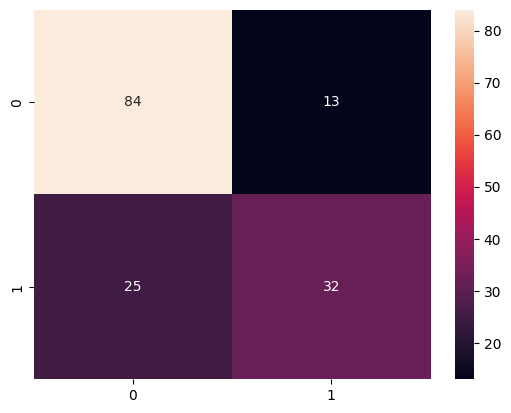

In [31]:
acc = metrics.accuracy_score(y_test,y_pred)
clf = metrics.classification_report(y_test,y_pred)
confmat = metrics.confusion_matrix(y_test,y_pred)

print(acc)
print(clf)
sns.heatmap(confmat,annot=True)

In [32]:
y_prob = model.predict_proba(x_test)[:,-1]
y_prob

array([0.26666368, 0.17102047, 0.02641387, 0.20852351, 0.00121146,
       0.03871497, 0.02992744, 0.14416171, 0.3796102 , 0.0156413 ,
       0.90908297, 0.250783  , 0.0842535 , 0.16373904, 0.87873169,
       0.82537459, 0.05707312, 0.03201053, 0.48846888, 0.50307557,
       0.22077234, 0.03858351, 0.06134591, 0.88877846, 0.41365025,
       0.01365499, 0.03611166, 0.01110432, 0.12446945, 0.18926203,
       0.10711306, 0.74092158, 0.95436546, 0.15727287, 0.00739508,
       0.8696875 , 0.99660717, 0.49917134, 0.63948361, 0.02109538,
       0.13475821, 0.3380286 , 0.79905594, 0.59991222, 0.46667923,
       0.00954333, 0.47433806, 0.08000988, 0.3047252 , 0.99634594,
       0.01438528, 0.09869046, 0.24796966, 0.06645779, 0.81784782,
       0.61942824, 0.44398563, 0.00523236, 0.2589157 , 0.02649024,
       0.68063976, 0.10260474, 0.75806436, 0.05459938, 0.9075874 ,
       0.91020118, 0.47956431, 0.10816685, 0.01556194, 0.00840733,
       0.00470367, 0.04311113, 0.14787446, 0.45567772, 0.03473

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_prob)
rocauc = metrics.auc(fpr,tpr)
rocauc

0.8064749502622536

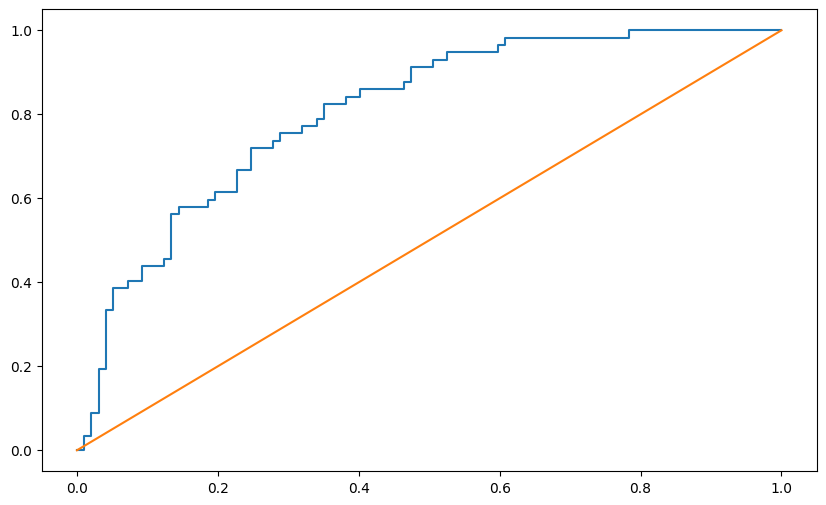

In [34]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="rocauc"+str(rocauc))
plt.plot([0,1],[0,1])

In [35]:
optimal_threshold_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_threshold_idx]
optimal_threshold

0.15727287325403042